In [172]:
import pickle
from urllib.parse import unquote
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def albums_by_genre(df, genre, drop_genres=False):
    out = df[df['genre_' + genre].astype(bool)]
    if drop_genres:
        out = df_drop_genres(out)
    return out

def albums_by_band(df, band, drop_genres=False):
    out = df_short[df_short['band'] == band]
    if drop_genres:
        out = df_drop_genres(out)
    return out

def genres_by_band():
    return

def df_drop_genres(df):
    return df[df.columns[~df.columns.str.contains('genre_')]]

In [114]:
from scipy.stats import skew as spskew
from scipy.stats import kurtosis as spkurt
from sklearn.preprocessing import normalize, scale

In [101]:
scale(df_full['rtg'].values)

array([ 1.44507576,  0.607515  ,  0.38068105, ...,  0.06176699,
       -0.2934177 , -0.76735924])

In [4]:
files = ['bands/' + path for path in os.listdir('bands') if '.pkl' in path]
df_list = []
bands = []
for file in files:
    with open(file, 'rb') as f:
        band = pickle.load(f)
        if band.albums is not None:
            df = band.albums
            for genre in band.genres:
                df['genre_' + genre] = 1
            df['band'] = band.name
            df['origin'] = band.origin
            df_list.append(df)
            bands.append(band)
df_full = pd.concat(df_list, sort=False).fillna(0).reset_index(drop=True)

In [6]:
sigmoid = lambda x, a: 1 / (1 + np.exp(-a*x))
rtg = sigmoid(df_full['numrev'] - df_full['numrev'].mean(), 0.1) * sigmoid(df_full['avgrev'] - df_full['avgrev'].mean(), 0.1)
# rtg = scale(rtg.values)
rtg -= rtg.min()
rtg /= rtg.max()
df_full['rtg'] = rtg
cols = df_full.columns
genre_columns = cols[cols.str.contains('genre_')].sort_values()
genres = list(genre_columns.str[6:])
df_full = df_full[['band', 'origin', 'album', 'year', 'numrev', 'avgrev'] + list(genre_columns) + ['rtg']]
df_short = df_full[['band', 'origin', 'album', 'year', 'numrev', 'avgrev', 'rtg']]
for col in genre_columns:
    df_full[col] = df_full[col].astype(int)

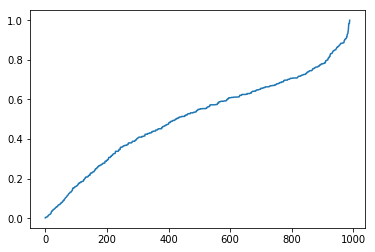

In [7]:
plt.plot(df_short['rtg'][df_short['numrev'] > 10].sort_values().values)
plt.show()

In [8]:
df_short.sort_values('rtg')[::-1]

,band,origin,album,year,numrev,avgrev,rtg
1032,Black Sabbath,United Kingdom,Paranoid,1970,30,94,1.000000
5038,Metallica,United States,Ride_the_Lightning,1984,28,94,0.983364
1435,Burzum,Norway,Hvis_lyset_tar_oss,1994,28,94,0.983364
2127,Death,United States,Symbolic,1995,30,93,0.981660
6770,Sepultura,Brazil,Beneath_the_Remains,1989,27,93,0.956100
3993,Iron Maiden,United Kingdom,Powerslave,1984,26,93,0.946104
4919,Megadeth,United States,Rust_in_Peace,1990,32,90,0.932566
4648,Lykathea Aflame,Czech Republic,Elvenefris,2000,21,96,0.929594
4111,Judas Priest,United Kingdom,Painkiller,1990,26,92,0.927308
5172,Morbid Saint,United States,Spectrum_of_Death,1990,21,95,0.915130


In [171]:
genre_data = []
for genre in genres:
    df = albums_by_genre(df_full, genre, drop_genres=True)
    x = (genre, df.shape[0], df['year'].min(), df['year'].max(), df['rtg'].mean(), df['rtg'].max())
    genre_data.append(x)
genre_ratings = pd.DataFrame(genre_data, columns=['genre', 'albums', 'start', 'end', 'avgrtg', 'maxrtg']).sort_values('avgrtg', ascending=False)
genre_ratings[genre_ratings['albums'] > genre_ratings['albums'].sum() / 100].sort_values('avgrtg', ascending=False)

,genre,albums,start,end,avgrtg,maxrtg
24,doom,860,1970,2018,0.387829,1.000000
76,progressive,915,1970,2018,0.382596,0.981660
93,technical,293,1985,2018,0.381300,0.929594
34,folk,430,1991,2018,0.374969,0.899660
90,speed,515,1977,2018,0.374014,0.932566
41,grindcore,212,1987,2017,0.368888,0.830585
20,death,2421,1984,2018,0.357856,0.981660
10,black,2200,1981,2018,0.352069,0.983364
46,heavy,1383,1968,2018,0.342039,1.000000
40,gothic,306,1985,2018,0.341496,0.768007


In [32]:
(
    pd.DataFrame(
        [
            (band.origin, len(albums_by_band(df_short, band.name))) 
            for band in bands
        ],
        columns=['origin', 'num_bands']
    )
    .groupby('origin')
    .sum()
    .sort_values('num_bands', ascending=False)
    [:20]
)

,num_bands
origin,
United States,2500
Sweden,910
Germany,901
United Kingdom,692
Finland,504
Norway,456
Canada,300
France,224
Italy,211


In [41]:
(df_short
 .groupby('band')['rtg']
 .mean()
 [df_short.groupby('band')['numrev'].sum() > 100]
 .sort_values(ascending=False)
 [:20]
)

band
Death             0.773775
Blind Guardian    0.655386
Bolt Thrower      0.619204
Immortal          0.618135
Iron Maiden       0.602549
Black Sabbath     0.587442
Bathory           0.583788
Symphony X        0.583093
Carcass           0.568279
Amon Amarth       0.547048
King Diamond      0.529887
Katatonia         0.525701
Opeth             0.523730
Behemoth          0.519877
Nile              0.516995
Kreator           0.513889
Judas Priest      0.503183
Amorphis          0.502315
Rush              0.496162
Dream Theater     0.488056
Name: rtg, dtype: float64

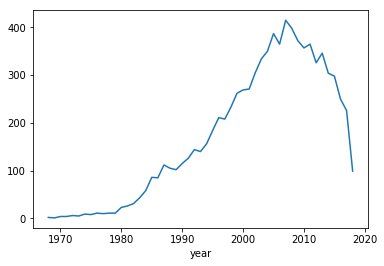

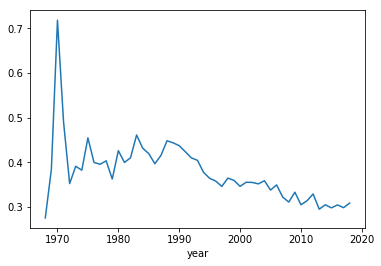

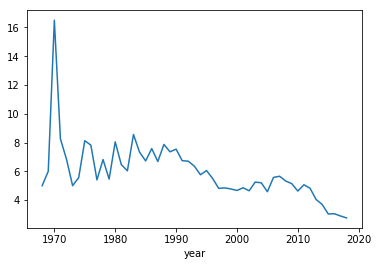

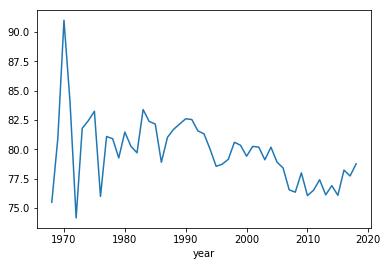

In [43]:
df_short.groupby('year').size().plot()
plt.show()
df_short.groupby('year')['rtg'].mean().plot()
plt.show()
df_short.groupby('year')['numrev'].mean().plot()
plt.show()
df_short.groupby('year')['avgrev'].mean().plot()
plt.show()

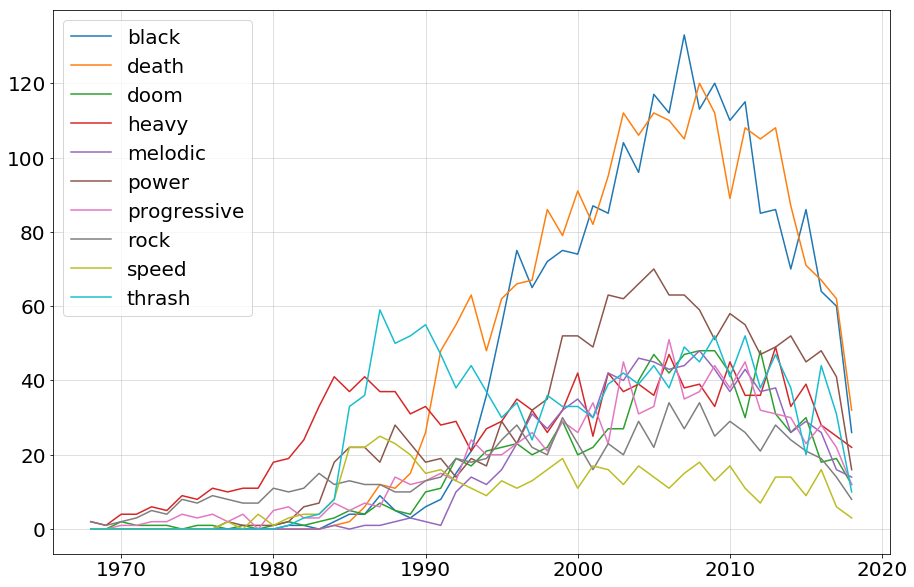

In [44]:
genre_years = df_full.groupby('year')[df_full.columns[df_full.columns.str.contains('genre_')]].sum()
plt.figure(figsize=(15,10))
for i, col in genre_years.iteritems():
    if col.sum() > 500:
        plt.plot(col.index, col.values, label=i.replace('genre_', ''))
# plt.plot(df_short.groupby('year').size(), 'k--', lw=5, label='all genres')
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(loc='upper left', fontsize=20)
plt.grid(alpha=0.5)
plt.show()

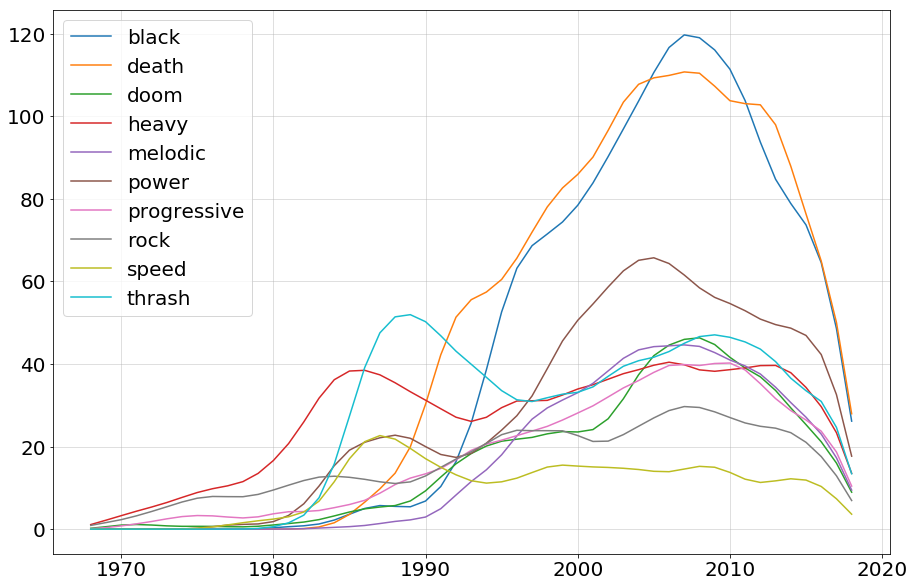

In [170]:
genre_years = df_full.groupby('year')[df_full.columns[df_full.columns.str.contains('genre_')]].sum()
plt.figure(figsize=(15,10))
for i, col in genre_years.iteritems():
    if col.sum() > 500:
        w = np.hanning(5)
        x = col.index
        y = col.values
        y = np.convolve(y, w/w.sum(), mode='same')
        y = np.convolve(y, w/w.sum(), mode='same')
        y = np.convolve(y, w/w.sum(), mode='same')
        plt.plot(x, y, label=i.replace('genre_', ''))
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(loc='upper left', fontsize=20)
plt.grid(alpha=0.5)
plt.show()

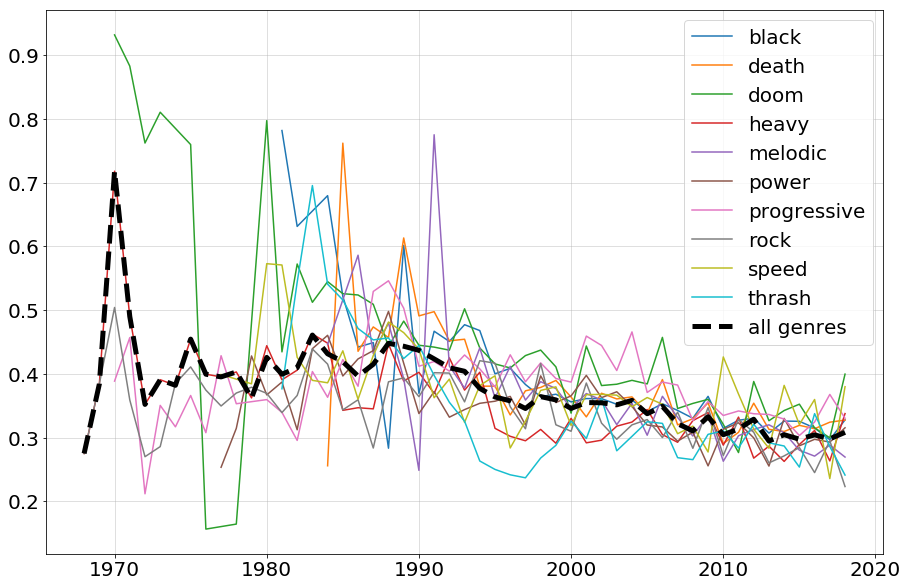

In [274]:
plt.figure(figsize=(15,10))
for genre in genres:
    df = albums_by_genre(df_full, genre)[['year', 'rtg']].sort_values('year').reset_index(drop=True)
    if len(df) > 500:
        series = df.groupby('year').mean()
        plt.plot(series.index, series.values, label=genre.replace('genre_', ''))
plt.plot(df_short.groupby('year')['rtg'].mean(), 'k--', lw=5, label='all genres')
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(loc='upper right', fontsize=20)
plt.grid(alpha=0.5)
plt.show()

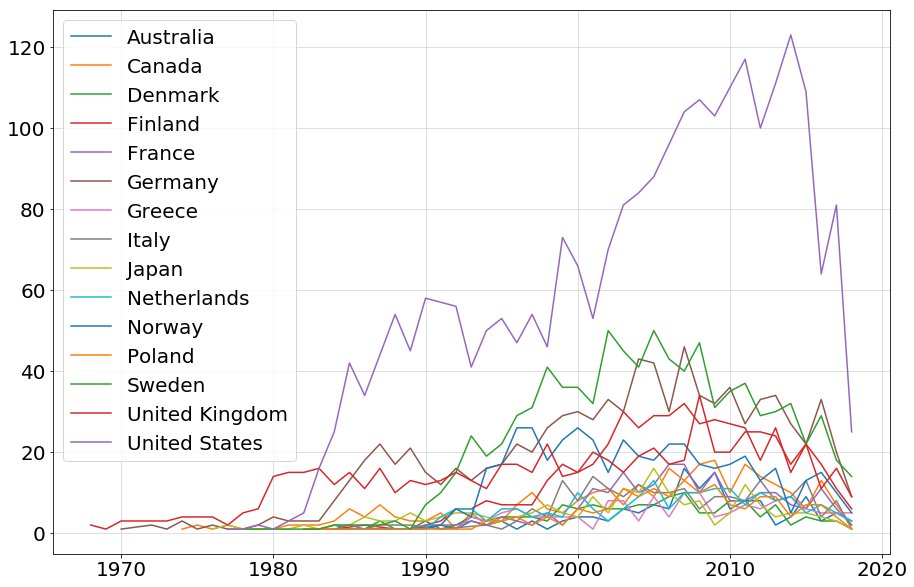

In [298]:
countries_albums = df_short.groupby('origin').size()
countries = countries_albums[countries_albums > 100]
plt.figure(figsize=(15,10))
for country in countries.index:
    df = df_short[df_short['origin'] == country]
    series = df.groupby('year').size()
    plt.plot(series.index, series.values, label=country)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(loc='upper left', fontsize=20)
plt.grid(alpha=0.5)
plt.show()

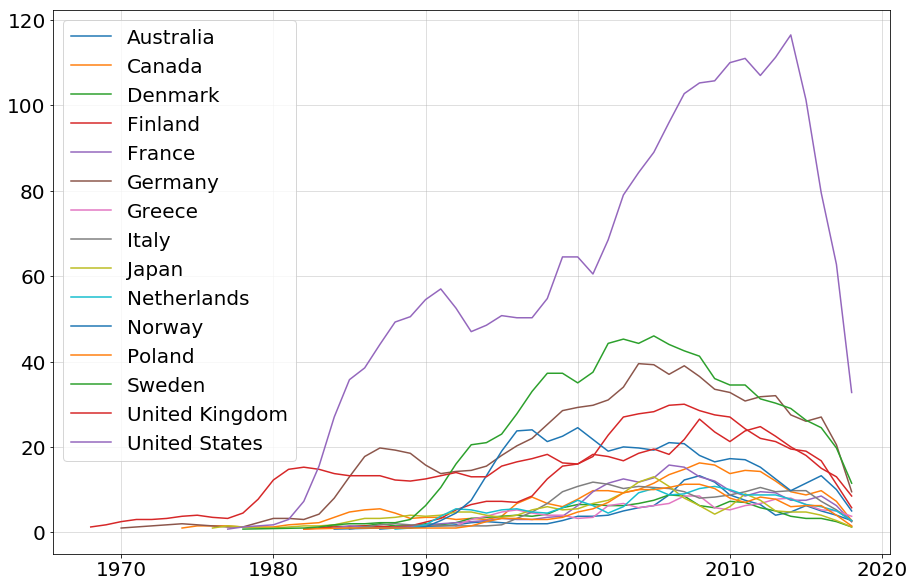

In [110]:
countries_albums = df_short.groupby('origin').size()
countries = countries_albums[countries_albums > 100]
plt.figure(figsize=(15,10))
for country in countries.index:
    df = df_short[df_short['origin'] == country]
    series = df.groupby('year').size()
    w = np.hanning(5)
    x = series.index
    y = series.values
    y = np.convolve(y, w/w.sum(), mode='same')
    plt.plot(x, y, label=country)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(loc='upper left', fontsize=20)
plt.grid(alpha=0.5)
plt.show()

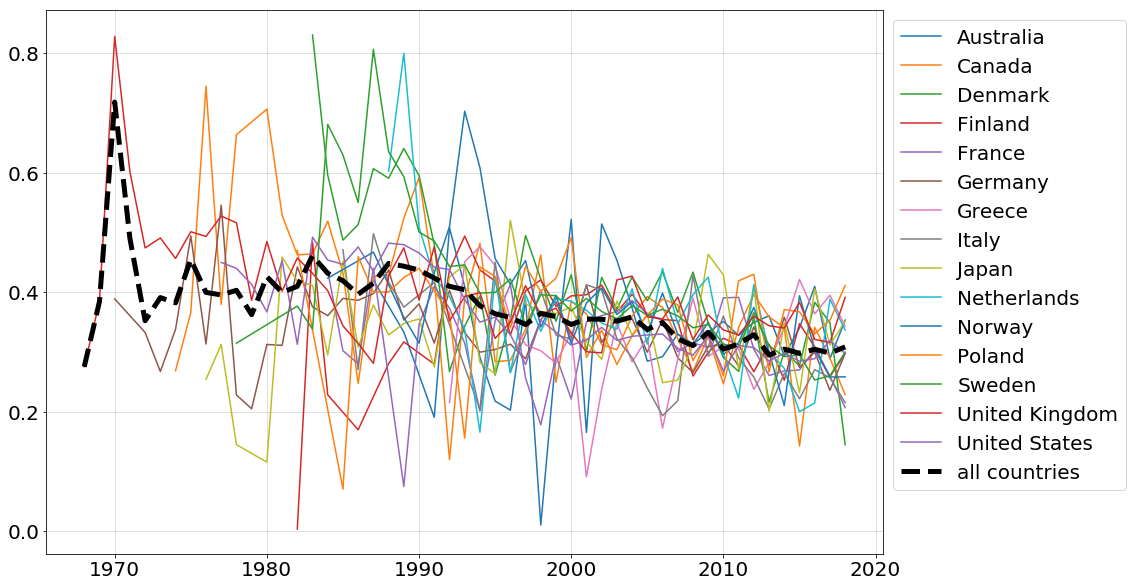

In [303]:
countries_albums = df_short.groupby('origin').size()
countries = countries_albums[countries_albums > 100]
plt.figure(figsize=(15,10))
for country in countries.index:
    df = df_short[df_short['origin'] == country]
    series = df.groupby('year')['rtg'].mean()
    plt.plot(series.index, series.values, label=country)
plt.plot(df_short.groupby('year')['rtg'].mean(), 'k--', lw=5, label='all countries')
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize=20)
plt.grid(alpha=0.5)
plt.show()

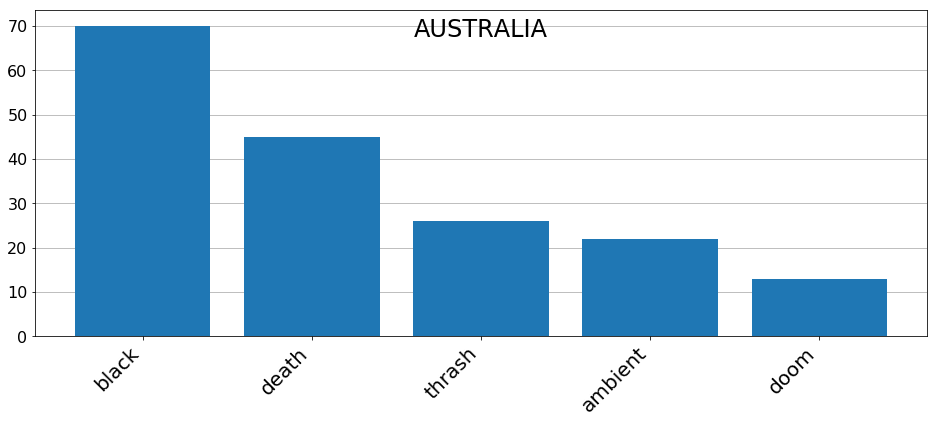

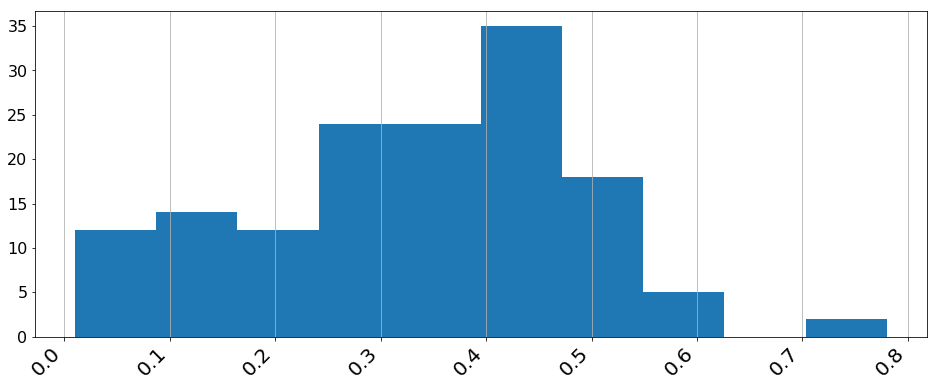

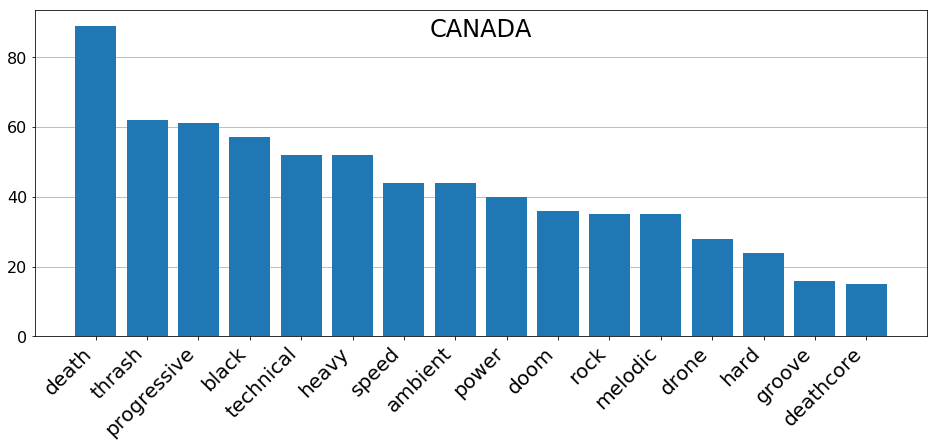

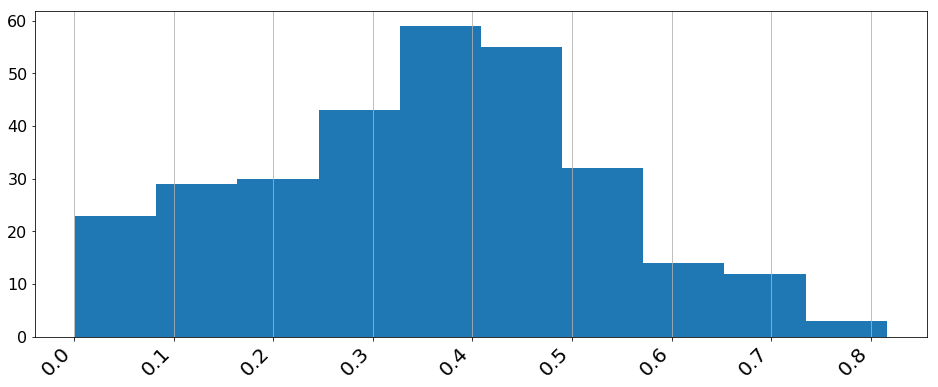

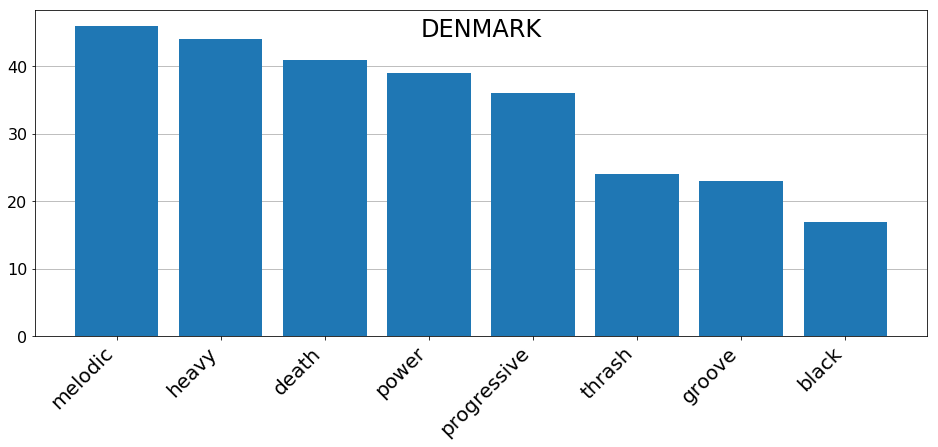

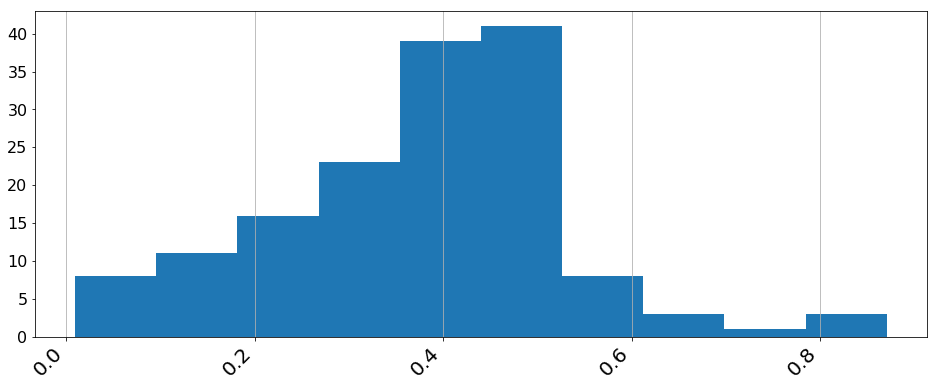

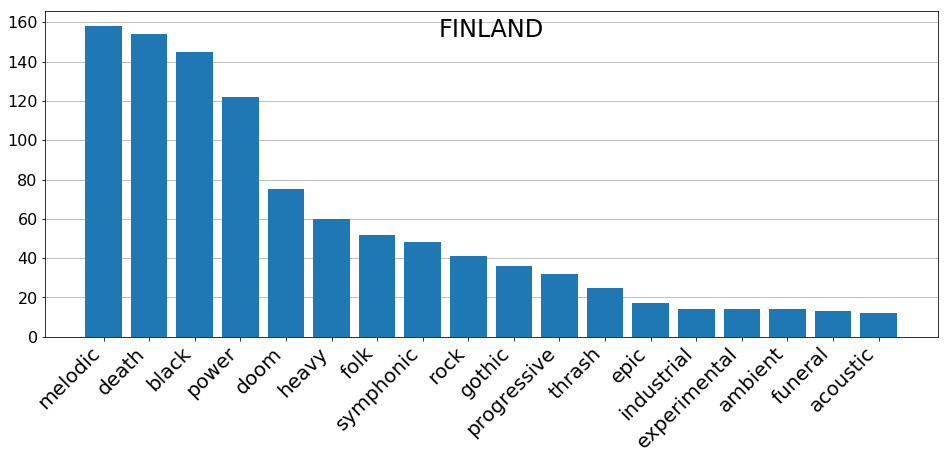

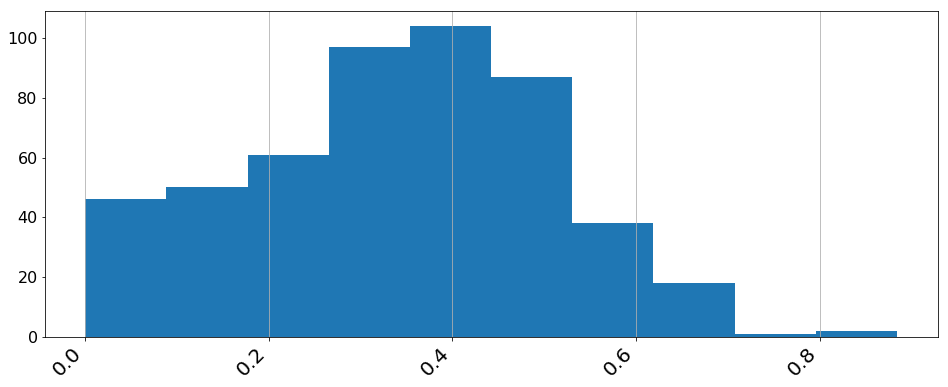

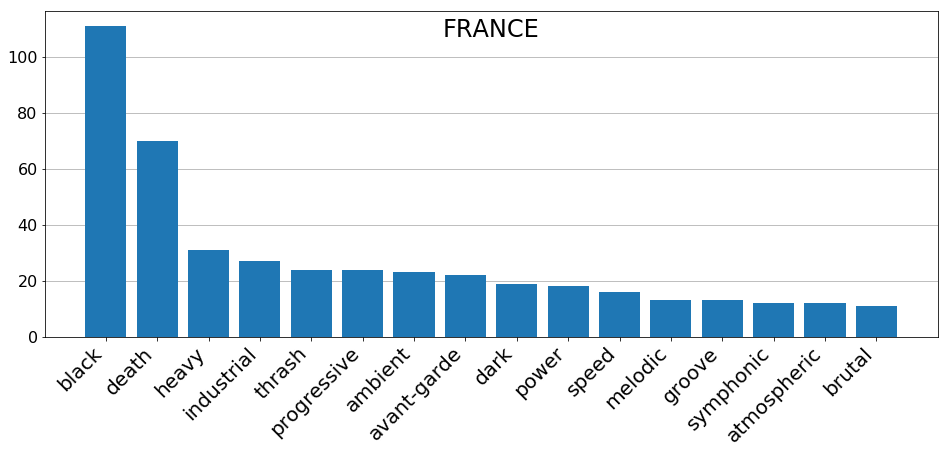

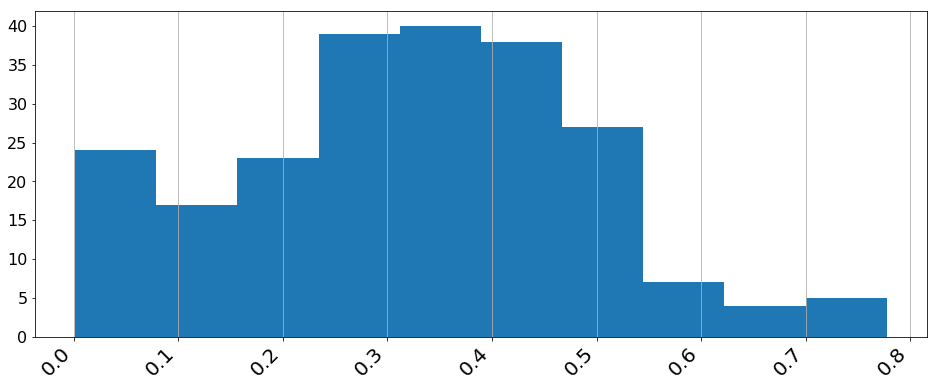

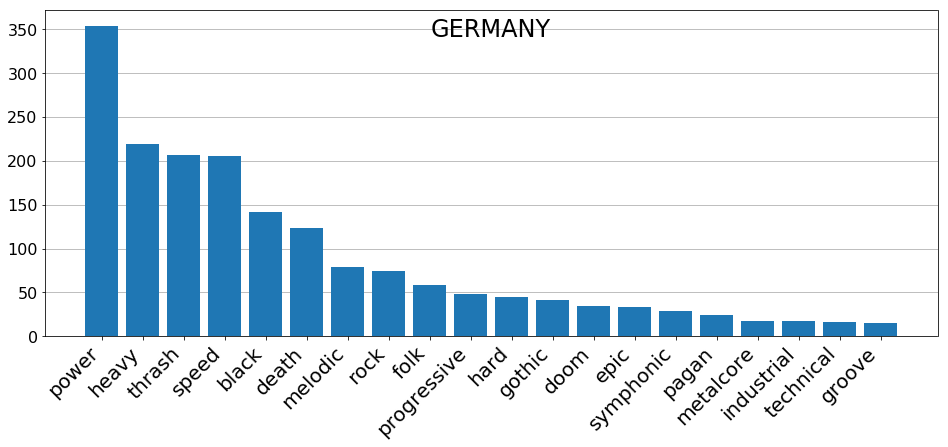

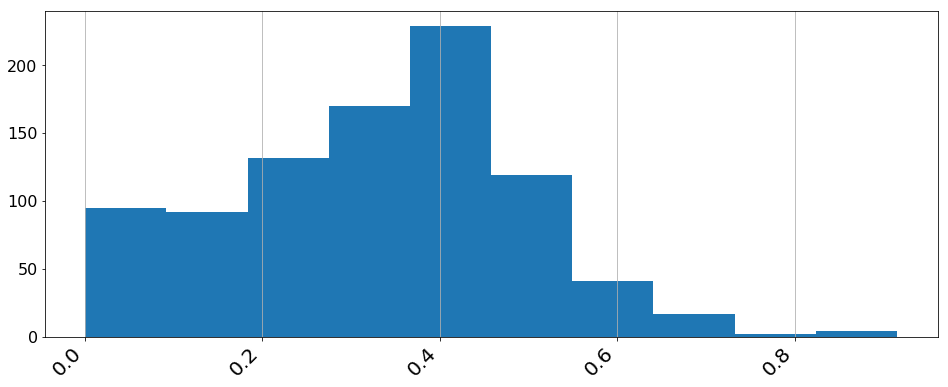

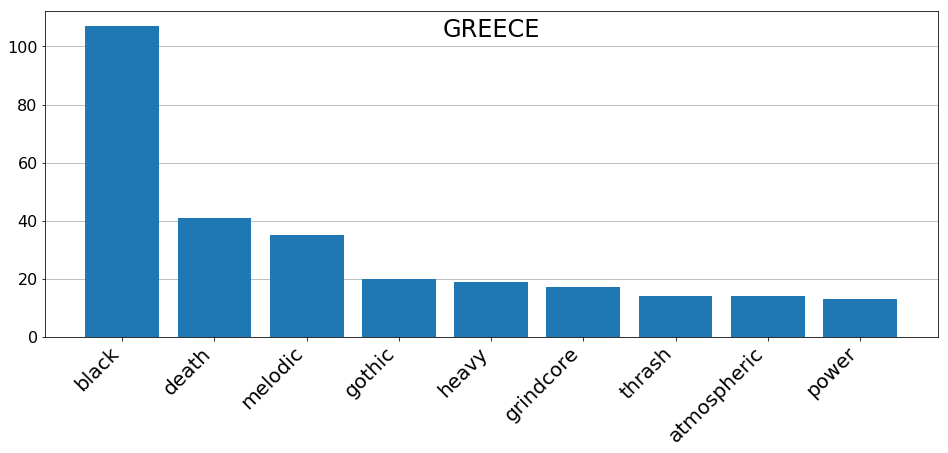

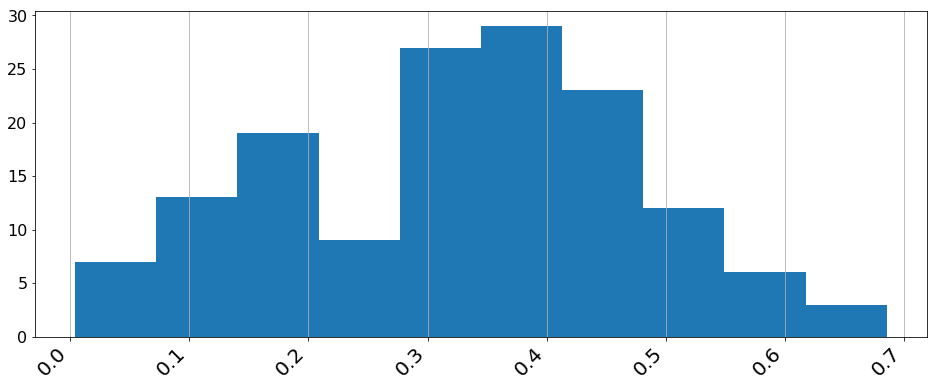

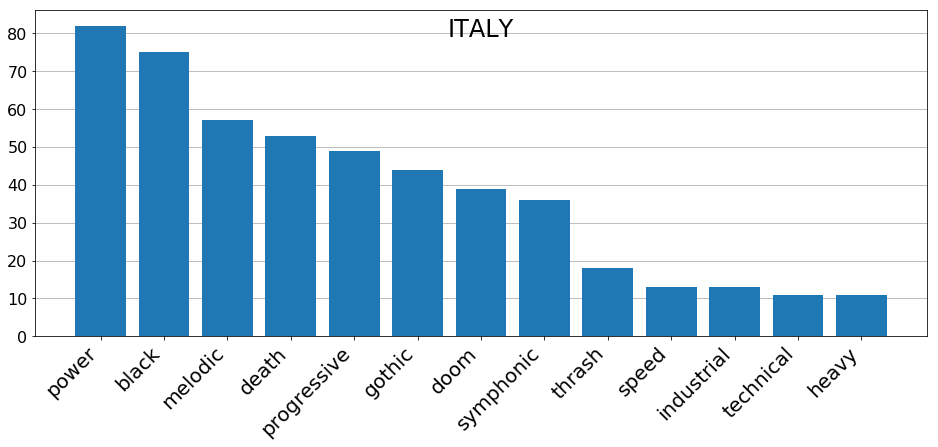

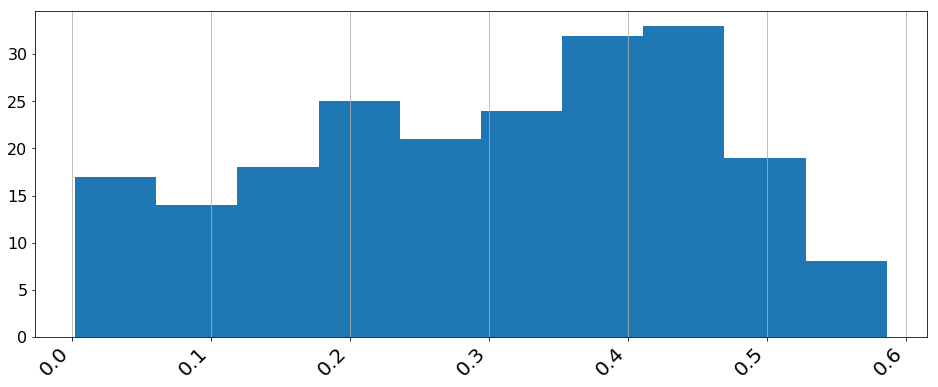

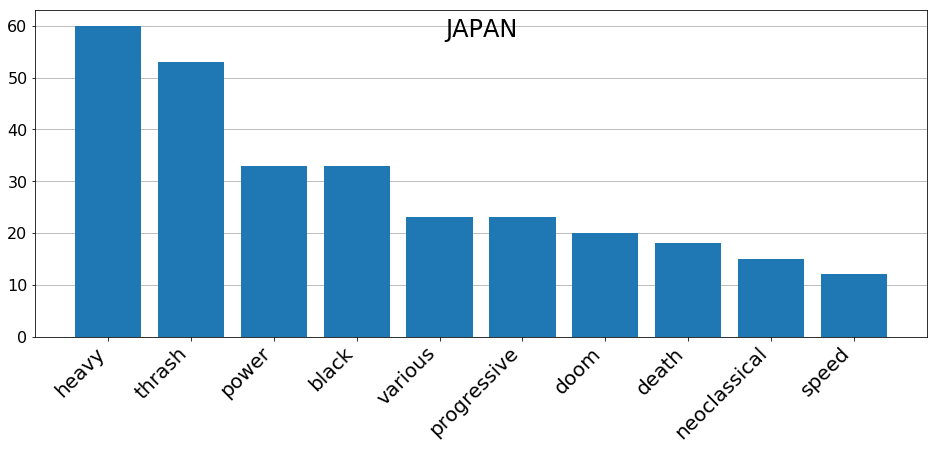

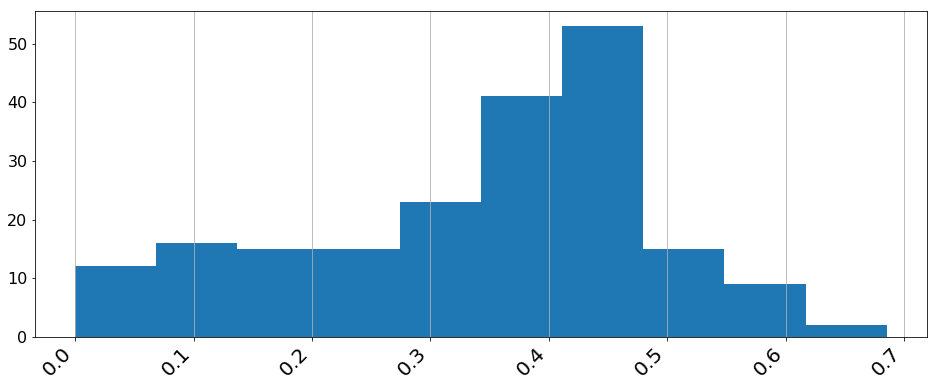

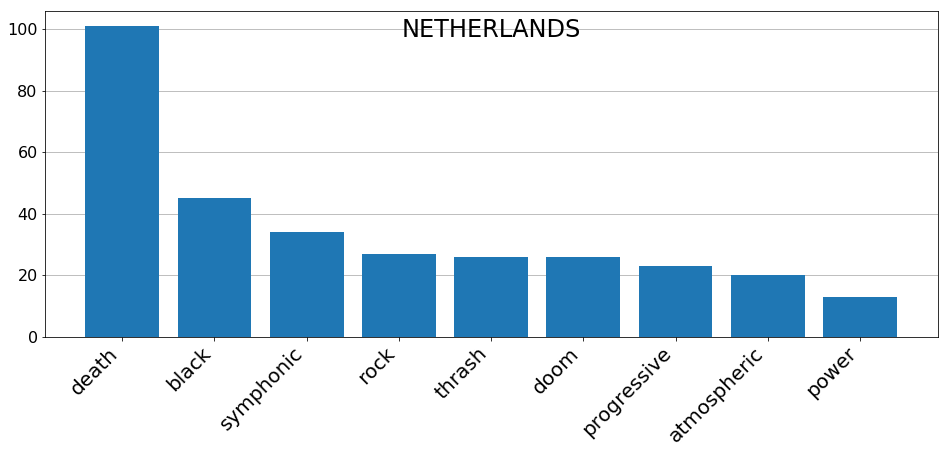

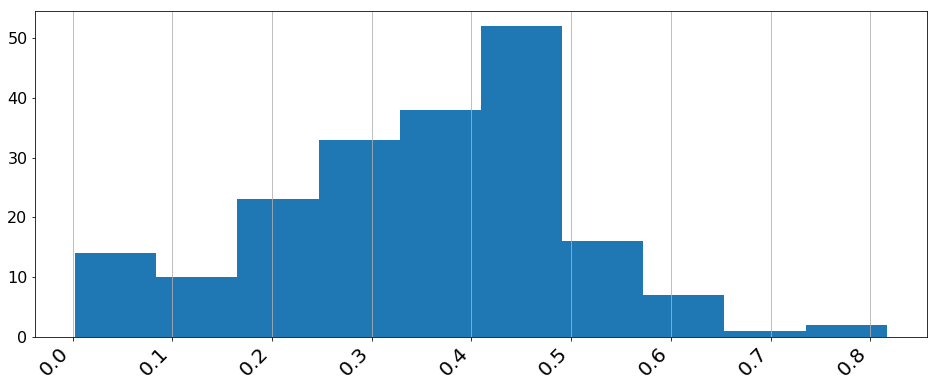

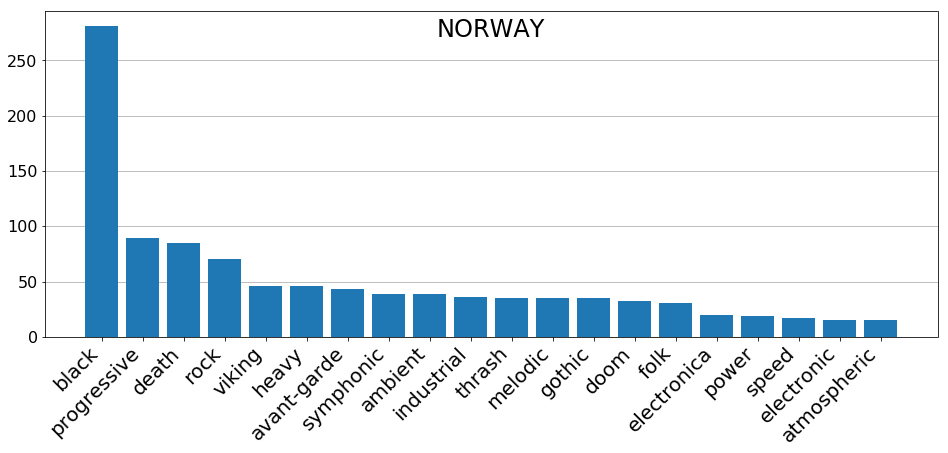

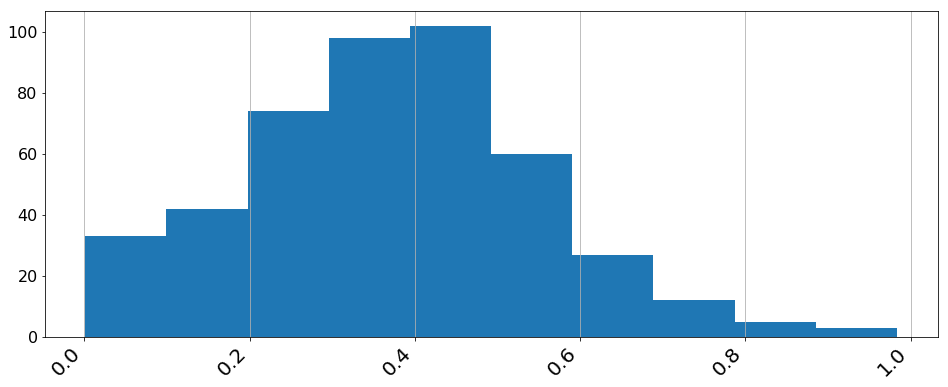

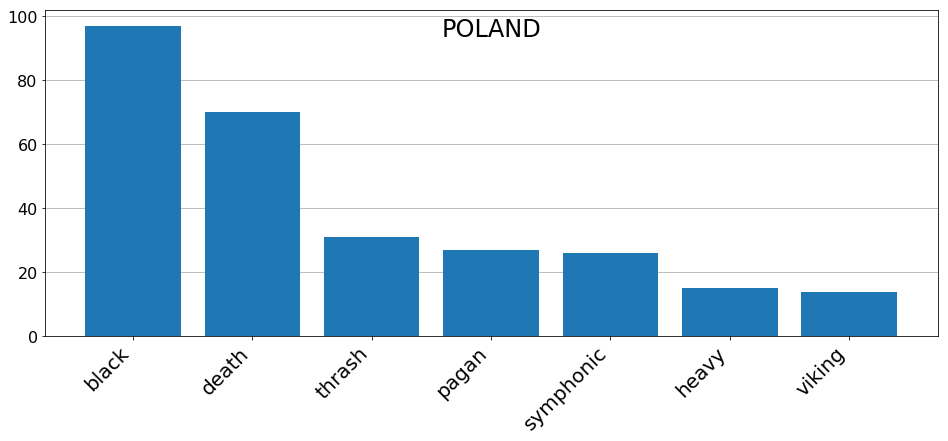

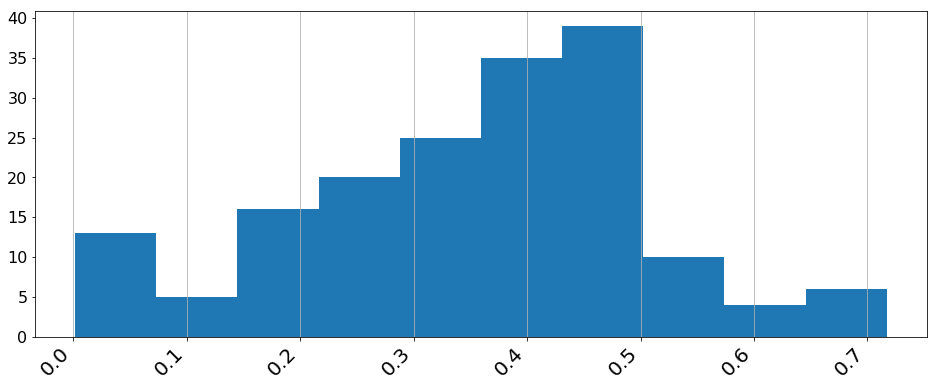

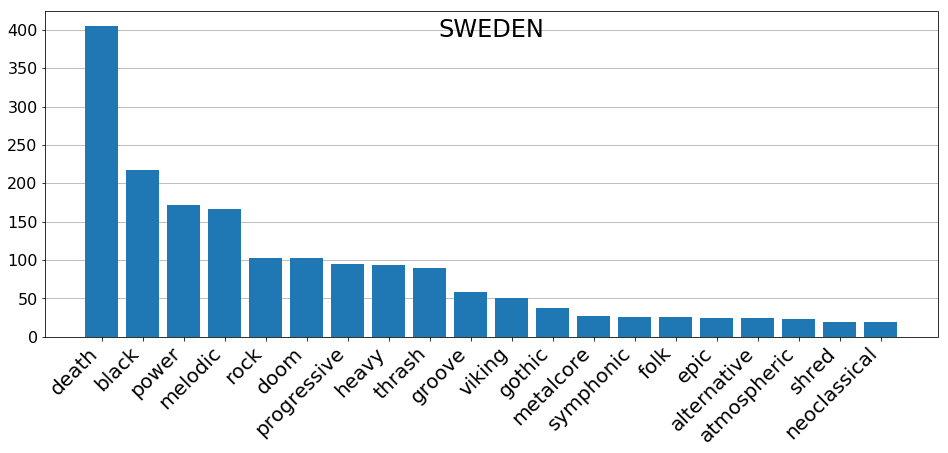

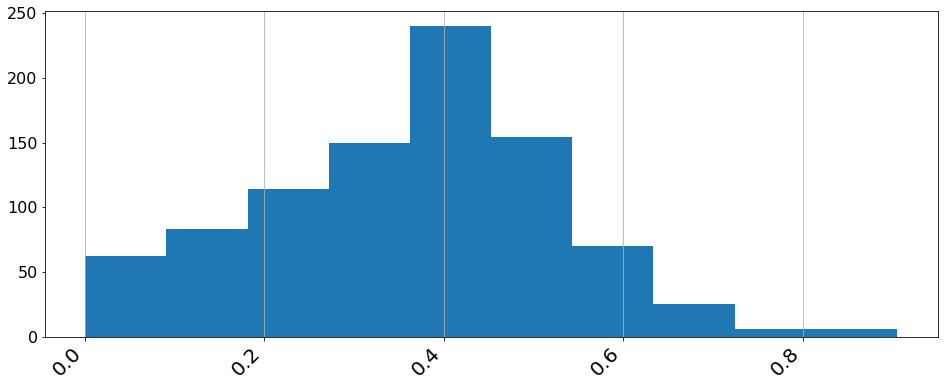

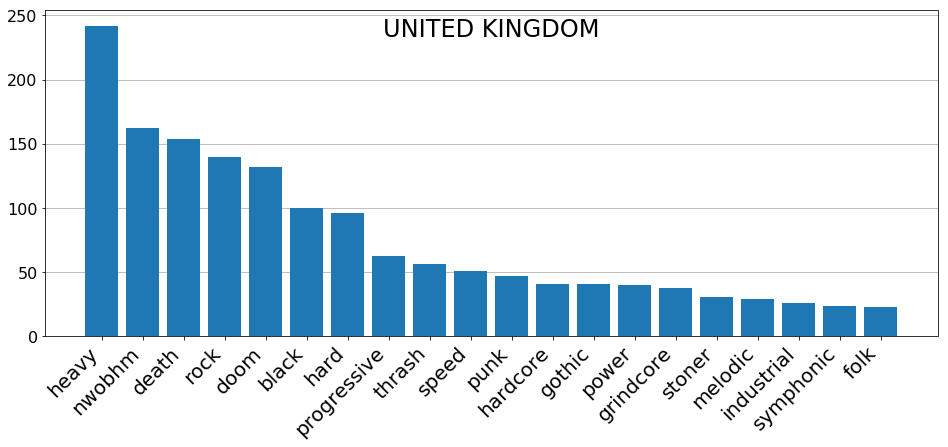

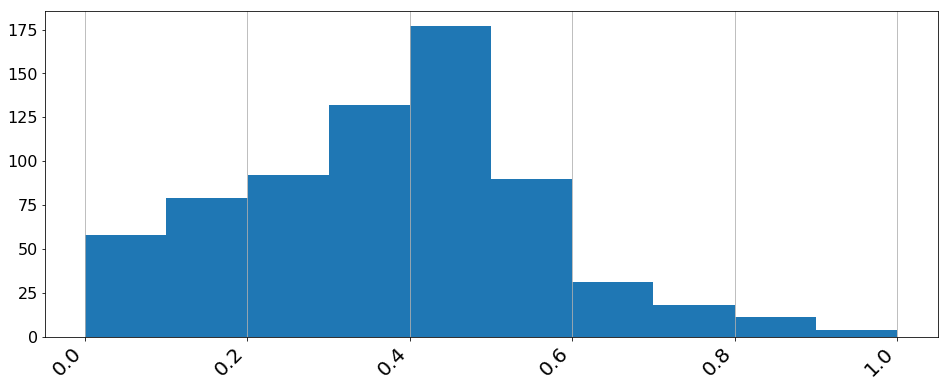

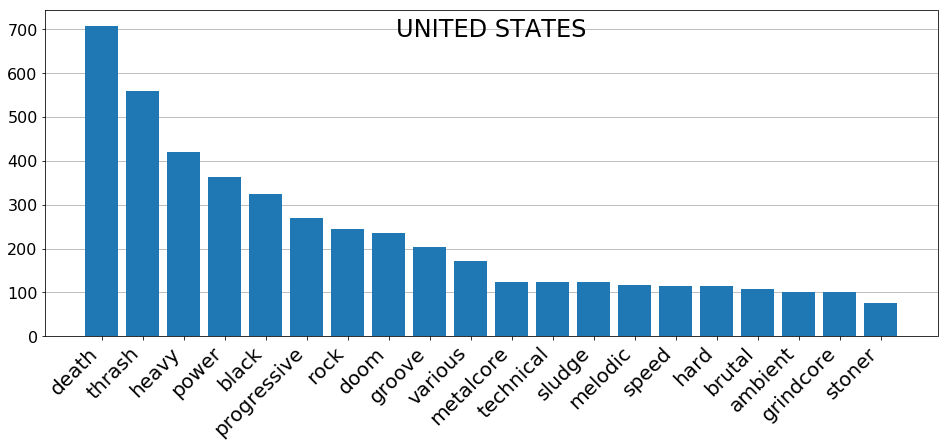

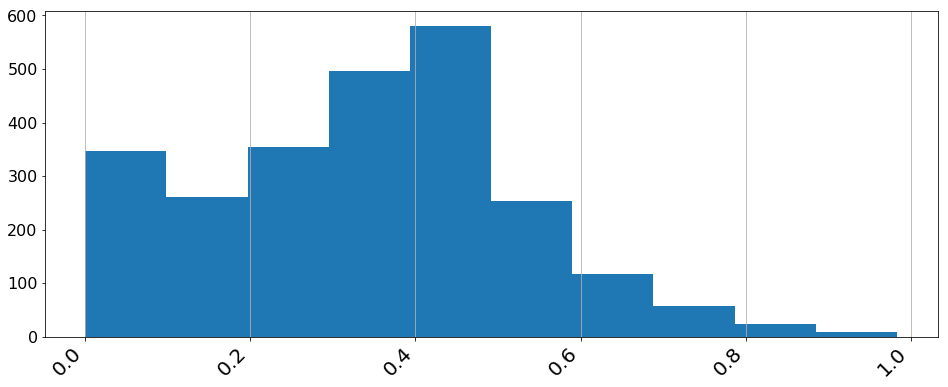

In [169]:
for country in countries.index:
    df_country = df_full[df_full['origin'] == country]
    popular_genres = []
    albums_in_genre = []
    for genre in genres:
        num_albums = df_country['genre_' + genre].sum()
        if num_albums > 10:
            popular_genres.append(genre)
            albums_in_genre.append(num_albums)
    x, y = [
        list(k[::-1]) for k in 
        zip(
            *sorted(
                zip(popular_genres, albums_in_genre),
                key=lambda pair: pair[1]
            )
        )
    ]
    x = x[:20]
    y = y[:20]
    plt.figure(figsize=(16,6))
    plt.bar(x, y, zorder=3)
    plt.title(country.upper(), size=24, y=0.9)
    plt.xticks(fontsize=20, rotation=45, ha='right')
    plt.yticks(fontsize=16)
    plt.grid(axis='y')
    plt.show()
    
    plt.figure(figsize=(16,6))
    df_country['rtg'].hist()
#     plt.title(country.upper(), size=24, y=0.9)
    plt.xticks(fontsize=20, rotation=45, ha='right')
    plt.yticks(fontsize=16)
    plt.grid(axis='y')
    plt.show()